## Visualization: `plotnine` (aka `ggplot`)

### Programming for Data Science
### Created: April 11, 2023
---  

### PREREQUISITES
- variables
- data types
- numpy
- pandas

### SOURCES 
- https://plotnine.readthedocs.io/en/stable/index.html
- https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python/index.html

### OBJECTIVES
- Introduce some basic functionality of the `plotnine` (aka `ggplot`) package


### CONCEPTS
- creating various visualizations (e.g., barplot, histrogram, boxplot)
- changing xlabel, ylabel, and title
- changing figure styles and themes
- creating facets: `facet_wrap()` and `facet_grid()`

---

### `plotnine`

- Python provides various powerful plotting libraries to choose from. One of the most popular and oldest libraries is `matplotlib`, which serves as a basis for many other Python plotting libraries. In this lecture note, we will be using `plotnine`, which is a Python implementation of [The Grammar of Graphics](https://link.springer.com/book/10.1007/0-387-28695-0) and is inspired by the `ggplot2` package from `R`. `plotnine` is known for providing a user-friendly interface and generating publication-quality plots.


- Decompose graphics into eight components:

  + Data
  + Mapping
  + Geometries
  + Statistics
  + Scales
  + Facets
  + Coordinates
  + Themes

```
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>),
     stat = <STAT>,
     position = <POSITION>
  ) +
  <SCALE_FUNCTION> +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION> + ...
```  

#### Install plotnine

Install the `plotnine` library.

`pip install plotnine`

#### Load packages and import iris data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *

In [2]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


---

### Barplot


A boxplot is a widely used method of representing the distribution of data using a summary of five numbers (minimum, first quartile, second quartile, third quartile, and maximum). It provides information about outliers, symmetry of data, and the degree of grouping.



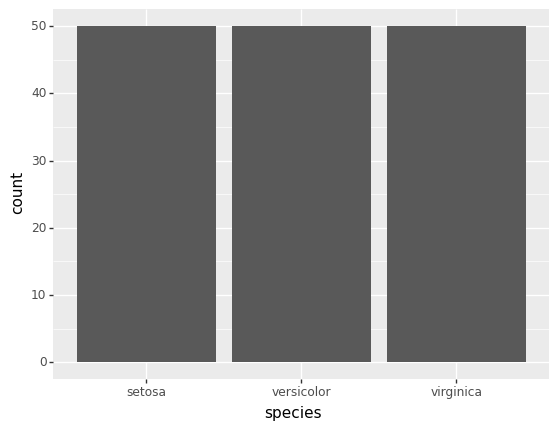

<ggplot: (8789919791228)>

In [4]:
ggplot(data=iris) + geom_bar(mapping = aes(x = "species"))

`geom_bar()` uses `stat_count()` by default. We can reproduce the barplot using `stat_count()`. 

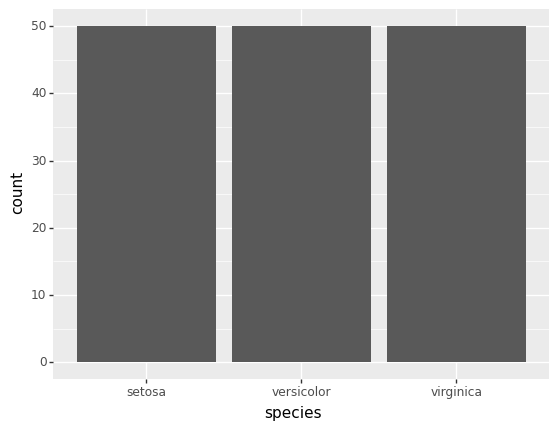

<ggplot: (8789974219012)>

In [5]:
ggplot(data=iris) + stat_count(aes(x = "species"))

If you have precomputed data, use `identity` stat.

In [6]:
species_counted = pd.DataFrame({'species':['setosa', 'versicolor', 'virginica'], 'count':[50, 50, 50]})
species_counted

,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


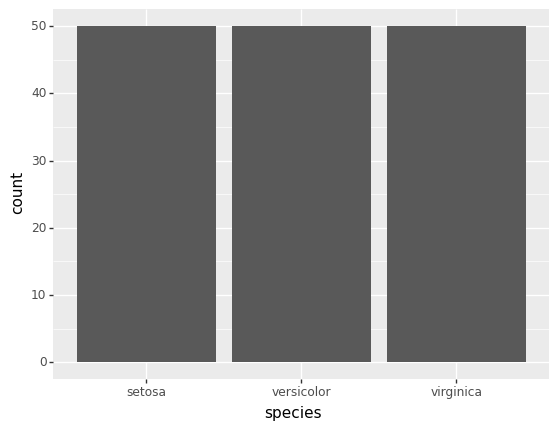

<ggplot: (8789974238335)>

In [7]:
ggplot(species_counted) + geom_bar(aes(x = "species", y = "count"), stat = 'identity')

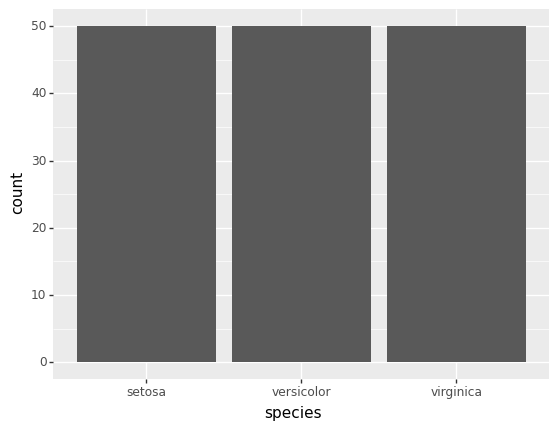

<ggplot: (8789919990902)>

In [8]:
ggplot(species_counted) + geom_col(aes(x = "species", y = "count")) # shortcut

A stacked plot with frequencies

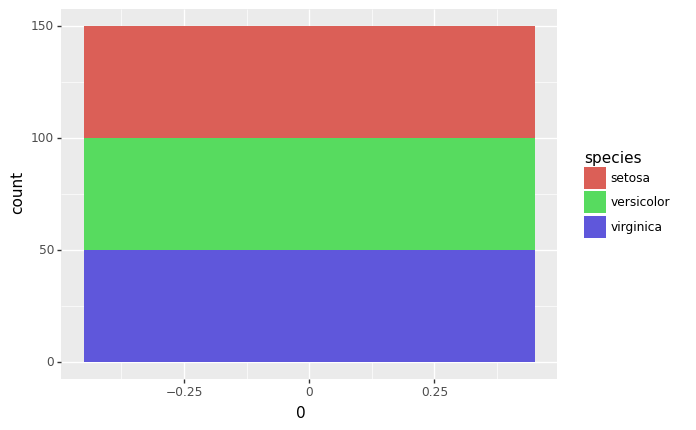

<ggplot: (8789953485135)>

In [9]:
ggplot(species_counted) + geom_bar(aes(x=0, y = "count", fill="species"), stat = "identity") 

Based on the vector type of the variable *sepal_high*, a discrete colour scale is picked.

In [10]:
# create a new variable named 'sepal_high' to indicate whether the values of sepal lengh are higher than its median.
iris["sepal_high"] = iris.sepal_length > iris.sepal_length.median()

# if you like, you can convert 'sepal_high' column to (0, 1)
# iris.sepal_high = iris.sepal_high.replace({True: "1", False: "0"})

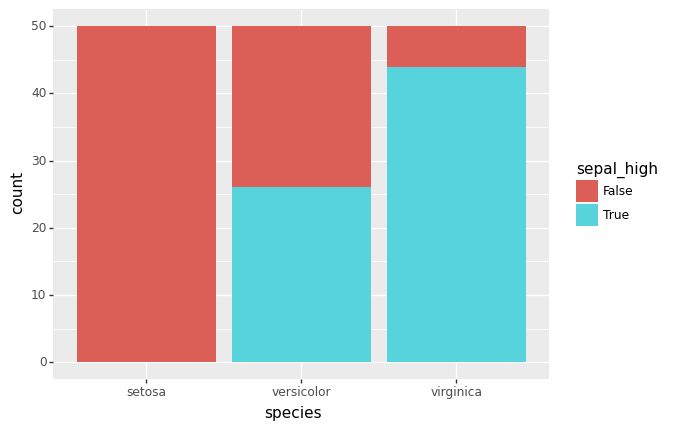

<ggplot: (8789919841142)>

In [11]:
ggplot(iris) + geom_bar(aes(x = "species", fill="sepal_high"))

You may want to change colors.

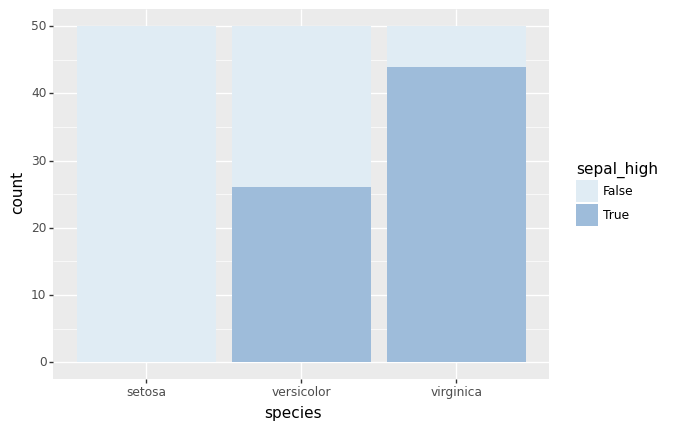

<ggplot: (8789919798167)>

In [12]:
ggplot(iris) + geom_bar(aes(x = "species", fill="sepal_high")) + scale_fill_brewer(palette=3)

You may want to choose colors manually.

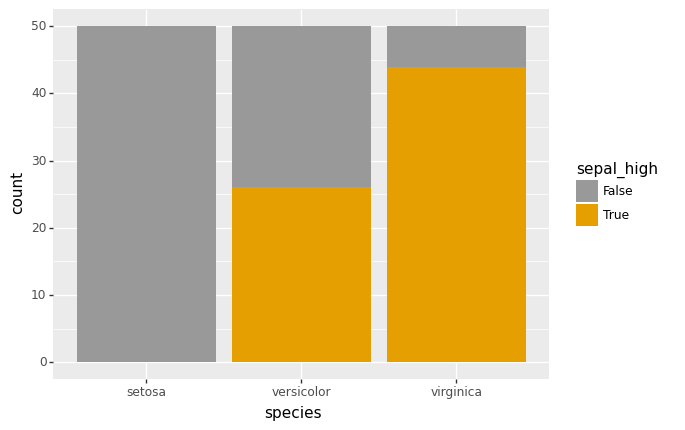

<ggplot: (8789919842542)>

In [13]:
ggplot(iris) + geom_bar(aes(x = "species", fill="sepal_high")) + scale_fill_manual(values=("#999999", "#E69F00"))

A stacked plot with proportions. `position = "fill"` makes “proportion bars”.

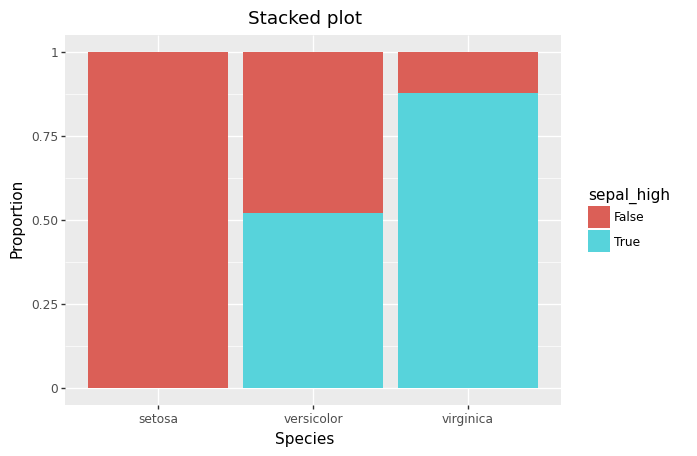

<ggplot: (8789953780718)>

In [14]:
ggplot(iris) + geom_bar(aes(x = "species", fill="sepal_high"), position = "fill") + \
  labs(x="Species", y="Proportion", title="Stacked plot")

---

### Histogram

Draw a histogram with a continuous variable.


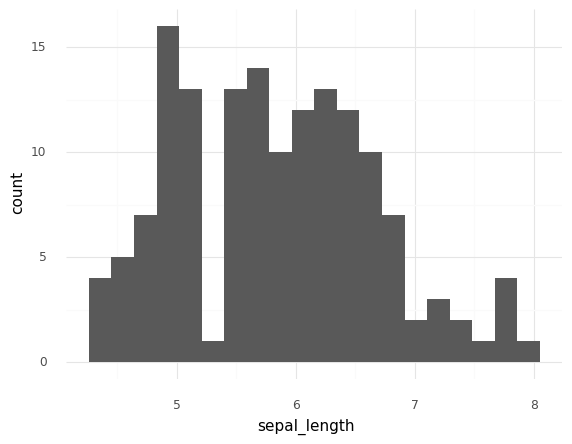

<ggplot: (8789953806577)>

In [15]:
ggplot(iris) + geom_histogram(aes(x = "sepal_length"), bins = 20) + theme_minimal()

Draw a density plot.

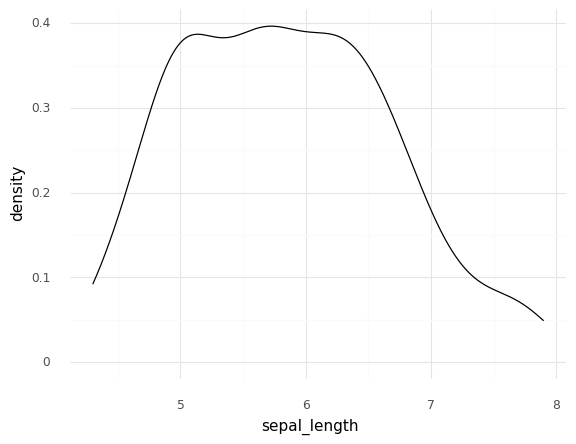

<ggplot: (8789953789410)>

In [16]:
ggplot(iris) + geom_density(aes(x = "sepal_length")) + theme_minimal()

Draw a histogram with groups.

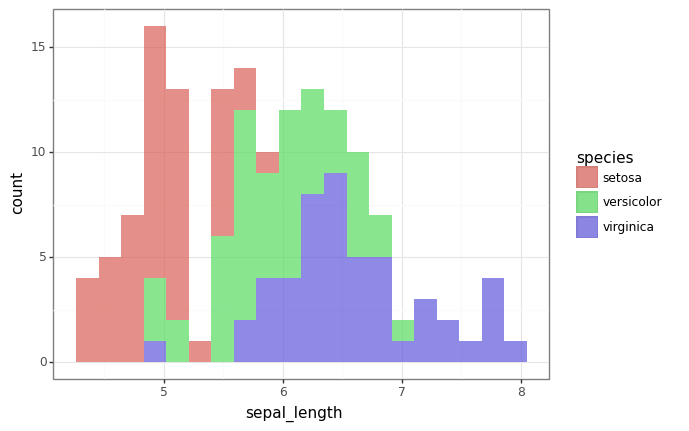

<ggplot: (8789974185313)>

In [17]:
ggplot(iris) + geom_histogram(aes(x = "sepal_length", fill="species"), bins=20, alpha=0.7) + theme_bw()

---

### Boxplot

Draw a boxplot.

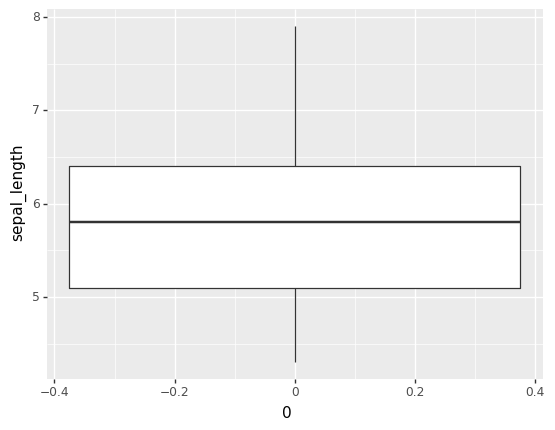

<ggplot: (8789974432401)>

In [18]:
ggplot(iris) + geom_boxplot(aes(x =0, y= "sepal_length")) 

Remove everything on the x-axis including the texts and tick marks.

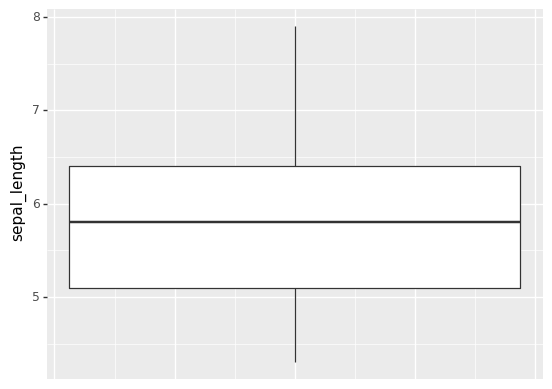

<ggplot: (8789920161708)>

In [19]:
ggplot(iris) + geom_boxplot(aes(x =0, y= "sepal_length")) + \
       theme(axis_title_x = element_blank(), axis_text_x = element_blank(), axis_ticks_major_x=element_blank())

Draw a boxplot by the variable *"species"*.

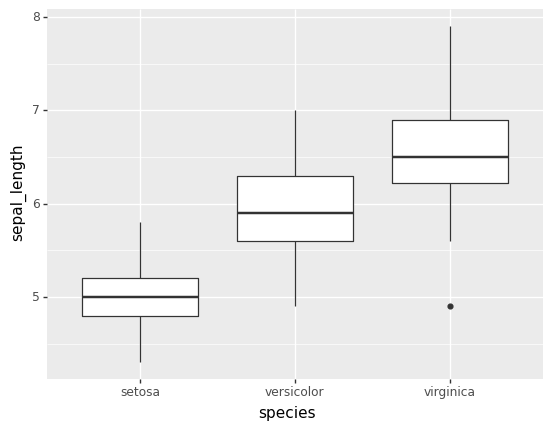

<ggplot: (8789953783077)>

In [20]:
ggplot(iris, aes(x = "species", y = "sepal_length")) + geom_boxplot()

---

### Violin Plot

A violin plot displays distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region.

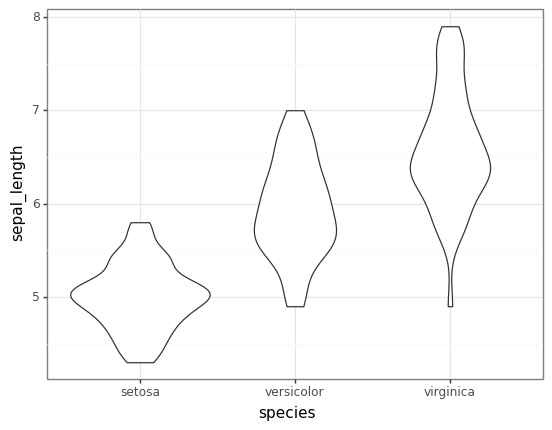

<ggplot: (8789953505627)>

In [21]:
ggplot(iris, aes(x = "species", y = "sepal_length")) + geom_violin() + theme_bw()

You may want to overlay data points.

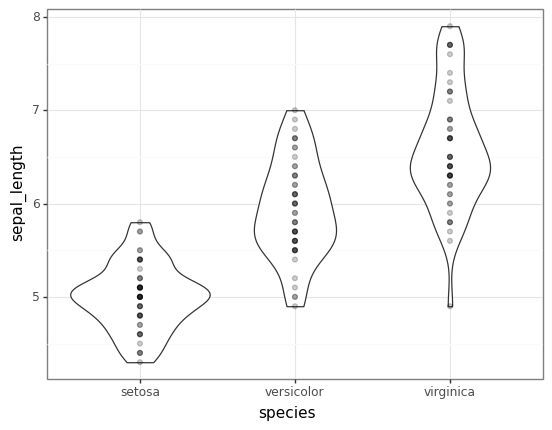

<ggplot: (8789974710010)>

In [22]:
ggplot(iris, aes(x = "species", y = "sepal_length")) + geom_violin() + \
  geom_point(alpha=0.2) + theme_bw()

You may want to jitter data points.

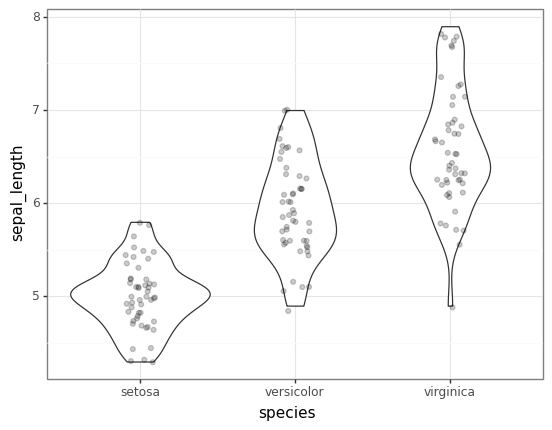

<ggplot: (8789987462238)>

In [23]:
ggplot(iris, aes(x = "species", y = "sepal_length")) + geom_violin() + \
  geom_jitter(width = 0.1, height = 0.1, alpha=0.2) + theme_bw()

---

### Quantile-Comparison Plot

Compare the observed (empirical) sample distribution of a variable with a theoretical distribution. 

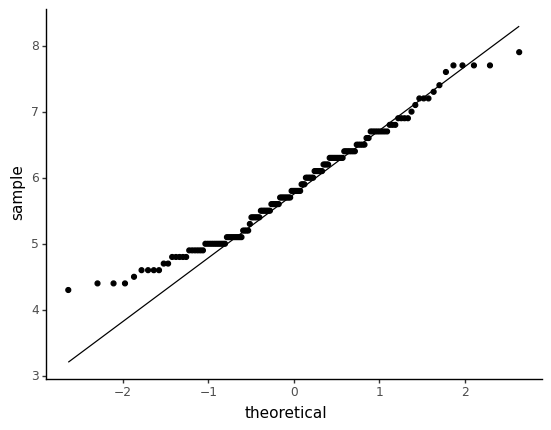

<ggplot: (8789987470574)>

In [24]:
ggplot(iris, aes(sample = "sepal_length")) + stat_qq() + stat_qq_line() + theme_classic()

---

### Scatterplot

`geom_point()` with two continuous variables

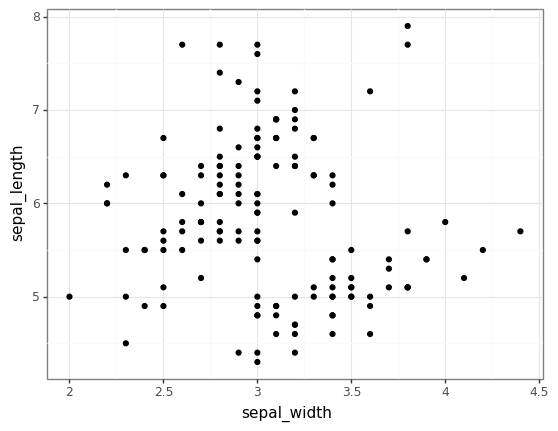

<ggplot: (8789920260735)>

In [25]:
ggplot(iris, aes(x = "sepal_width", y = "sepal_length")) + geom_point() + theme_bw()

Jittered scatterplot; “jittering” adds a small random quantity (uniformly distributed) to each
observation.

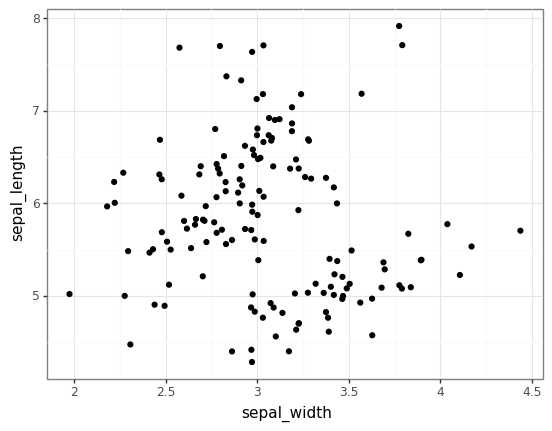

<ggplot: (8789974734038)>

In [26]:
ggplot(iris, aes(x = "sepal_width", y = "sepal_length")) + geom_jitter() + theme_bw()

Scatterplot with different transparency  levels; `alpha` controls the degree of transparency for data points.

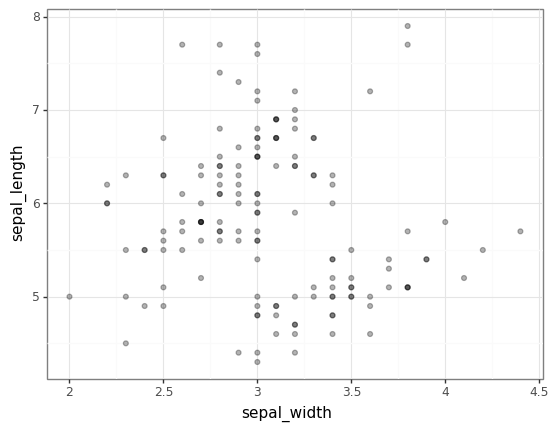

<ggplot: (8789954154406)>

In [27]:
ggplot(iris, aes(x = "sepal_width", y = "sepal_length")) + geom_point(alpha=0.3) + theme_bw()

Scatterplot with groups; use the argument `color` or `shape` inside `aes()`.

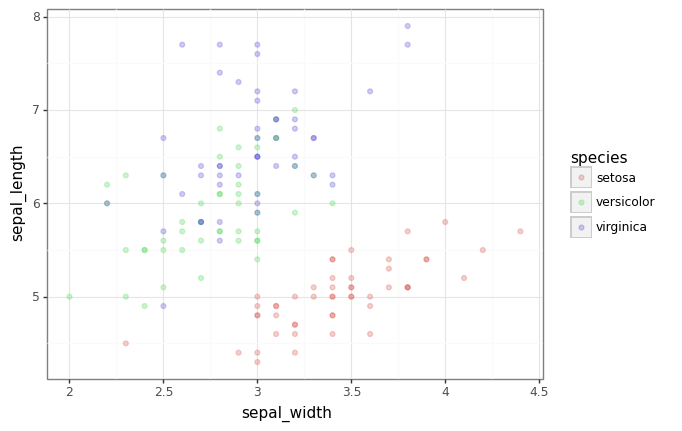

<ggplot: (8789974717730)>

In [28]:
# change color
ggplot(iris, aes(x = "sepal_width", y = "sepal_length", color="species")) + \
  geom_point(alpha=0.3) + theme_bw()

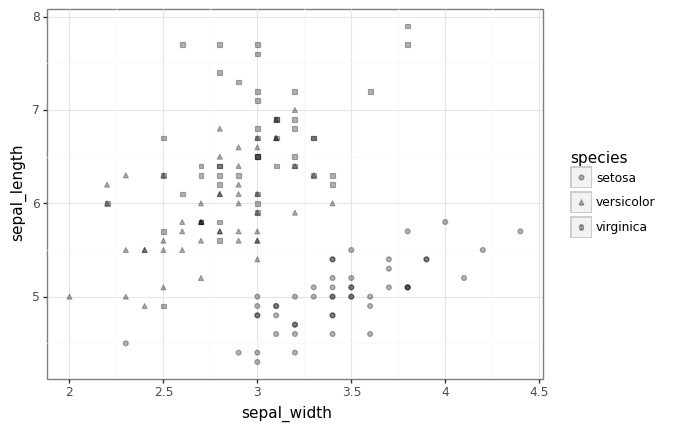

<ggplot: (8789920648605)>

In [29]:
# change shape
ggplot(iris, aes(x = "sepal_width", y = "sepal_length", shape="species")) + \
  geom_point(alpha=0.3) + theme_bw()

---
### Facets

- Two facet functions for splitting data by categories

- `facet_wrap()` : "wraps" a 1d ribbon of panels into 2d.

- `facet_grid()` : produces a 2d grid of panels defined by variables which form the rows and columns.


#### facet_wrap()

Use `facet_wrap()` with one categorical variable

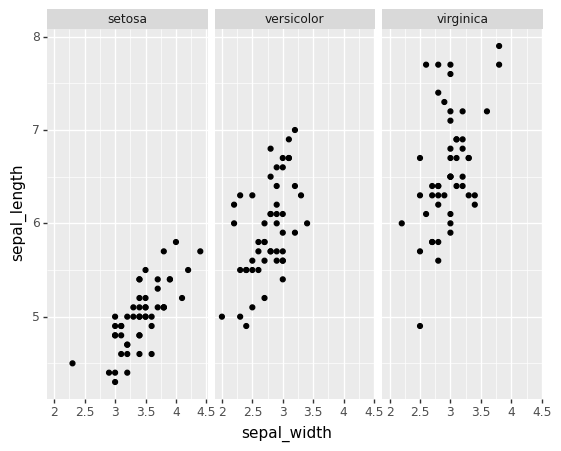

<ggplot: (8789974690570)>

In [30]:
ggplot(iris, aes(x = "sepal_width", y = "sepal_length")) + geom_point() + \
  facet_wrap(" ~ species")

Use `facet_wrap()` with two categorical variables: *"species"* and *"sepal_high"*

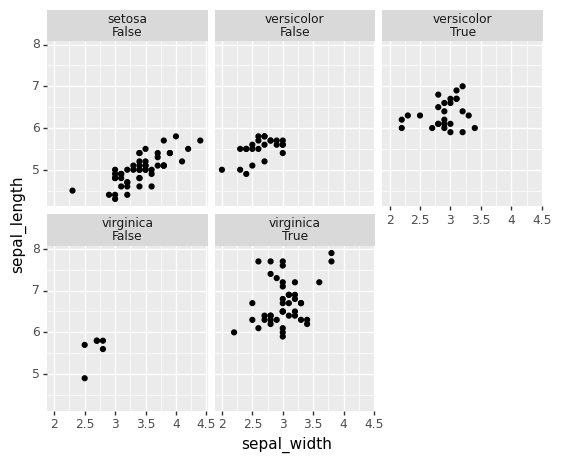

<ggplot: (8789987747024)>

In [31]:
ggplot(iris, aes(x = "sepal_width", y = "sepal_length")) + geom_point() + \
  facet_wrap("~ species + sepal_high") # consider adding ', nrow=1' to the facet_wrap function to specify the number of rows in the resulting plot grid.

#### facet_grid()

Use `facet_grid()` with variables *"species"* and *"sepal_high"*. 

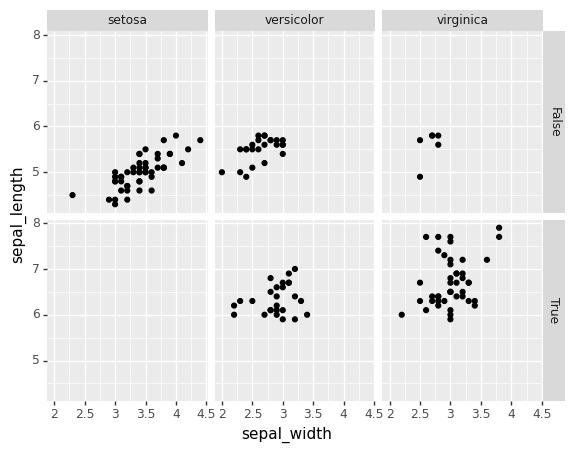

<ggplot: (8789974240883)>

In [32]:
ggplot(iris, aes(x = "sepal_width", y = "sepal_length")) + geom_point() + \
  facet_grid("sepal_high ~ species ")

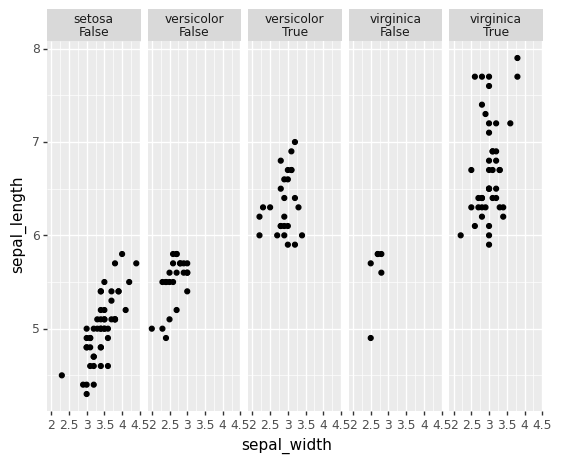

<ggplot: (8789987444764)>

In [33]:
ggplot(iris, aes(x = "sepal_width", y = "sepal_length")) + geom_point() + \
  facet_grid(" ~ species +  sepal_high")

---
### Combing multiple plots

`patchworklib` is a library that allows the creation of composite plots using `matplotlib`, `seaborn`, and `plotnine`. It was inspired by the `patchwork` package in ggplot2. The library allows for easy alignment of matplotlib plots using "/" and "|" (or "+") operators.

install patchworklib
`pip install patchworklib`

In [34]:
import patchworklib as pw

In [35]:
g1 = ggplot(data=iris) + geom_bar(mapping = aes(x = "species"))
g2 = ggplot(iris) + geom_histogram(aes(x = "sepal_length"), bins = 20) + theme_minimal()
g3 = ggplot(iris, aes(x = "sepal_width", y = "sepal_length", shape="species")) + \
  geom_point(alpha=0.3) + theme_bw()

g1 = pw.load_ggplot(g1, figsize=(2,2))
g2 = pw.load_ggplot(g2, figsize=(2,2))
g3 = pw.load_ggplot(g3, figsize=(4,2))

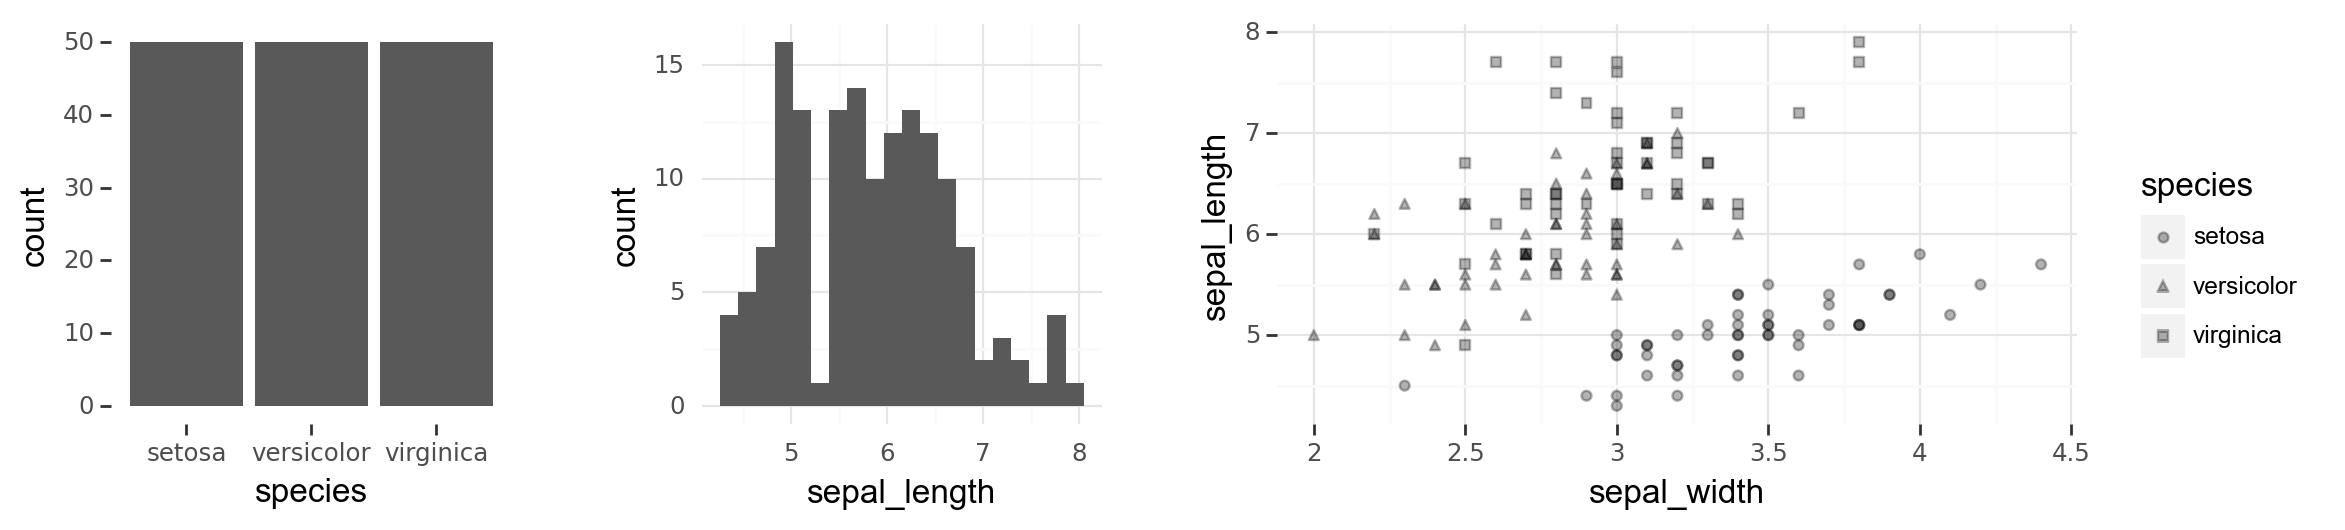

In [36]:
# arrange three plots horizontally
g123 = (g1|g2|g3) # try with the symbol "+" instead of "|"
g123

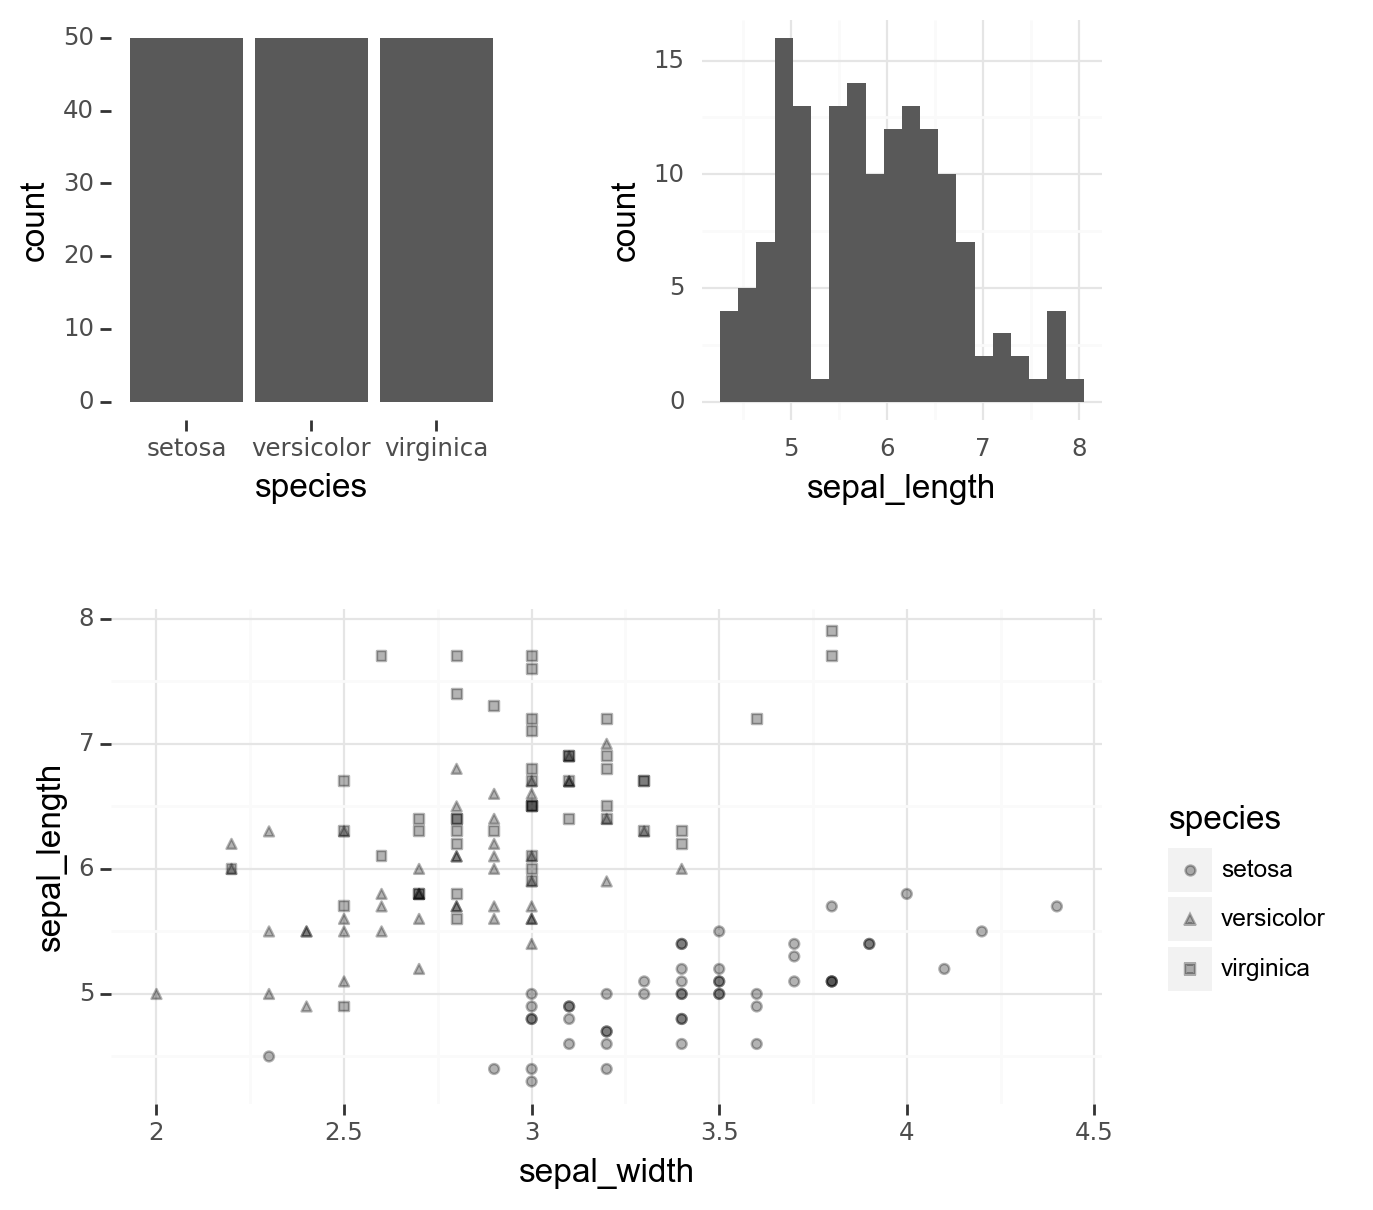

In [37]:
# place the first two plots at the top and the third one at the bottom
g123_2 = (g1|g2)/g3 # try with the symbol "+" instead of "|"
g123_2

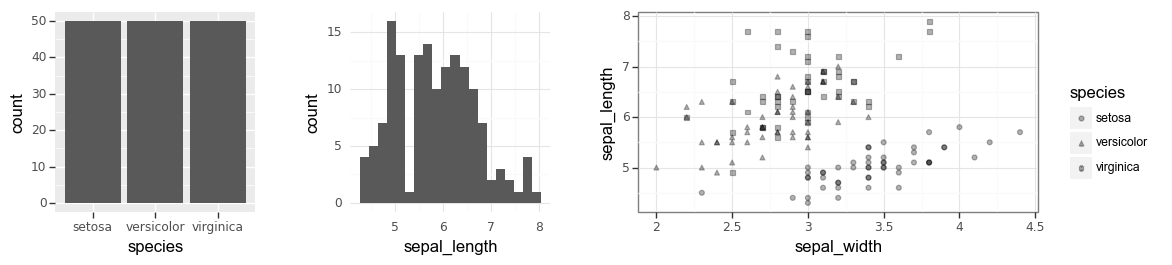

In [38]:
g123.savefig("figure_plotnine.png") # save figure

---

### TRY FOR YOURSELF
Do the following:


Use the petal length variable (“petal_length”) of the iris data and plot

- a kernel density estimate,
- a set of boxplots showing the distribution of “petal_length” by "species" 

You need to use `patchworklib` package to create a plotting region consisting of two subplots. Fianlly, save the plot as a `.png` file.

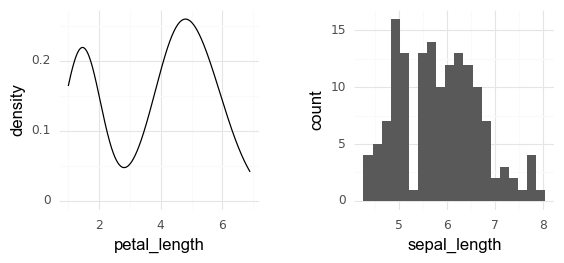

In [39]:
p1 = ggplot(iris) + geom_density(aes(x = "petal_length")) + theme_minimal()
p2 = ggplot(iris, aes(x = "species", y = "petal_length", color = "species")) + geom_boxplot() + theme_minimal()

p1 = pw.load_ggplot(p1, figsize=(2,2))
p2 = pw.load_ggplot(p2, figsize=(2,2))

g12 = p1|g2
g12.savefig("figure2_plotnine.png")